In [62]:
import csv
import matplotlib as mpl
import matplotlib.pyplot as plt

In [66]:
# font_name = 'AppleGothic' # for mac
font_name = mpl.font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
# print(font_name)
mpl.rc('font', family=font_name)

In [4]:
# f = open('file_name', 'rt', encoding='utf-8')
# # f 사용
# f.close()

with open('data-files/age.csv', 'rt', encoding="utf-8") as f:
    reader = csv.reader(f)

    # for line in reader:
    for idx, line in enumerate(reader):
        if idx < 2:
            print(line)


['행정구역', '2020년11월_계_총인구수', '2020년11월_계_연령구간인구수', '2020년11월_계_0세', '2020년11월_계_1세', '2020년11월_계_2세', '2020년11월_계_3세', '2020년11월_계_4세', '2020년11월_계_5세', '2020년11월_계_6세', '2020년11월_계_7세', '2020년11월_계_8세', '2020년11월_계_9세', '2020년11월_계_10세', '2020년11월_계_11세', '2020년11월_계_12세', '2020년11월_계_13세', '2020년11월_계_14세', '2020년11월_계_15세', '2020년11월_계_16세', '2020년11월_계_17세', '2020년11월_계_18세', '2020년11월_계_19세', '2020년11월_계_20세', '2020년11월_계_21세', '2020년11월_계_22세', '2020년11월_계_23세', '2020년11월_계_24세', '2020년11월_계_25세', '2020년11월_계_26세', '2020년11월_계_27세', '2020년11월_계_28세', '2020년11월_계_29세', '2020년11월_계_30세', '2020년11월_계_31세', '2020년11월_계_32세', '2020년11월_계_33세', '2020년11월_계_34세', '2020년11월_계_35세', '2020년11월_계_36세', '2020년11월_계_37세', '2020년11월_계_38세', '2020년11월_계_39세', '2020년11월_계_40세', '2020년11월_계_41세', '2020년11월_계_42세', '2020년11월_계_43세', '2020년11월_계_44세', '2020년11월_계_45세', '2020년11월_계_46세', '2020년11월_계_47세', '2020년11월_계_48세', '2020년11월_계_49세', '2020년11월_계_50세', '2020년11월_계_51세', '2020년11월_계_52세', '2020년

In [25]:
# 함수 만들기
# 동 이름을 전달인자로 받아서 데이터 조회
# 조회된 데이터 반환
def select_population_by_dong(dong):
    with open('data-files/age.csv', 'rt', encoding="utf-8") as f:
        reader = csv.reader(f)

        next(reader) # 현재 행 읽기 + 다음 행으로 이동
        result = []
        # for line in reader:
        for _, line in enumerate(reader):       
            if dong in line[0]:
                # data = line[3:].map(lambda v: int(v.replace(',', '')))
                data = [ int(v.replace(',', '')) for v in line[3:] ]
                result.append(line[:1] + data)

    return result

In [26]:
# 테스트 : 사용자로부터 동 이름 입력 받은 후 위에서 만든 함수 호출
dong = input("동 이름 : ")
population = select_population_by_dong(dong)
print(population)

[['서울특별시 종로구 청운효자동(1111051500)', 49, 69, 56, 87, 74, 97, 95, 87, 121, 99, 106, 113, 117, 136, 116, 93, 139, 105, 127, 106, 157, 148, 158, 146, 170, 147, 149, 168, 194, 168, 156, 148, 156, 157, 148, 176, 156, 167, 198, 235, 207, 226, 182, 182, 216, 218, 202, 246, 231, 229, 240, 220, 217, 219, 195, 179, 174, 164, 180, 195, 185, 172, 149, 146, 137, 151, 118, 126, 123, 83, 107, 108, 97, 119, 97, 93, 95, 105, 102, 88, 80, 87, 68, 61, 59, 49, 37, 39, 25, 22, 13, 15, 9, 7, 10, 6, 6, 5, 4, 1, 20], ['경기도 고양시 덕양구 효자동(4128156000)', 140, 134, 132, 165, 215, 165, 161, 129, 140, 147, 91, 103, 73, 82, 82, 59, 75, 69, 65, 99, 117, 109, 114, 114, 121, 162, 165, 186, 190, 204, 184, 225, 237, 222, 235, 241, 247, 264, 274, 242, 243, 238, 178, 180, 182, 176, 176, 175, 149, 158, 152, 156, 163, 143, 151, 158, 153, 151, 137, 168, 135, 127, 112, 112, 101, 110, 74, 69, 85, 41, 64, 55, 54, 53, 44, 43, 50, 40, 55, 31, 37, 33, 27, 21, 28, 22, 6, 15, 20, 12, 6, 8, 8, 5, 2, 7, 0, 1, 2, 3, 20], ['강원도 춘천시 효자1동(4211062

In [27]:
import matplotlib.pyplot as plt

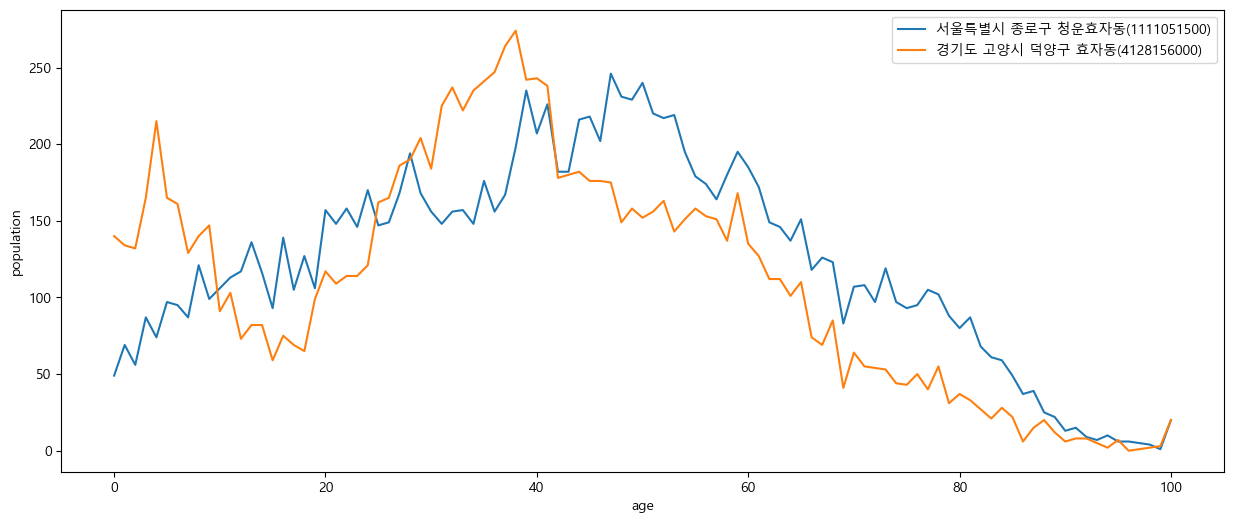

In [67]:
plt.figure(figsize=(15, 6))
plt.plot(population[0][1:], label=population[0][0])
plt.plot(population[1][1:], label=population[1][0])
plt.xlabel("age")
plt.ylabel("population")
plt.legend()
plt.show()

In [48]:
# age-with-gender 파일 사용
# 동 이름으로 남성의 연령별 인구와 여성의 연령별 인구 반환하는 함수 만들기
def select_population_by_dong2(dong):
    with open('data-files/age-with-gender.csv', 'rt', encoding="utf-8") as f:
        reader = csv.reader(f)

        next(reader) # 현재 행 읽기 + 다음 행으로 이동
        result = []
        result2 = {}
        # for line in reader:
        for _, line in enumerate(reader):       
            if dong in line[0]:
                # data = line[3:].map(lambda v: int(v.replace(',', '')))
                male_data = [ int(v.replace(',', '')) for v in line[106:207] ]
                female_data = [ int(v.replace(',', '')) for v in line[209:310] ]
                result.append(line[:1] + male_data + female_data)
                result2[line[0]] = { "male" : male_data, "female" : female_data }

    return result, result2

In [53]:
# 사용 테스트
list_result, dict_result = select_population_by_dong2('신도림')

print(list_result)
print(dict_result)


[['서울특별시 구로구 신도림동(1153051000)', 131, 166, 156, 178, 214, 203, 205, 177, 172, 202, 205, 186, 209, 188, 187, 183, 157, 161, 179, 173, 203, 171, 181, 219, 222, 235, 220, 222, 210, 216, 225, 231, 269, 285, 292, 274, 328, 385, 340, 361, 346, 367, 326, 303, 306, 299, 329, 340, 308, 295, 280, 271, 248, 238, 259, 264, 251, 221, 252, 235, 253, 230, 230, 198, 180, 219, 177, 162, 160, 111, 144, 145, 138, 149, 87, 68, 71, 63, 88, 67, 58, 43, 49, 30, 28, 19, 15, 16, 11, 10, 2, 4, 1, 2, 3, 2, 0, 4, 0, 1, 1, 131, 152, 157, 146, 182, 207, 199, 207, 234, 212, 175, 189, 202, 175, 155, 158, 155, 166, 163, 172, 210, 195, 197, 213, 246, 234, 223, 214, 259, 255, 242, 300, 303, 327, 330, 327, 347, 341, 360, 410, 349, 366, 337, 335, 321, 338, 319, 341, 293, 326, 306, 304, 281, 229, 242, 270, 226, 217, 237, 273, 258, 239, 236, 226, 196, 249, 191, 181, 195, 131, 136, 117, 122, 130, 74, 77, 74, 83, 83, 67, 59, 61, 54, 51, 55, 43, 41, 23, 24, 21, 13, 16, 11, 9, 7, 6, 5, 3, 1, 1, 8]]
{'서울특별시 구로구 신도림동(1153051000)':

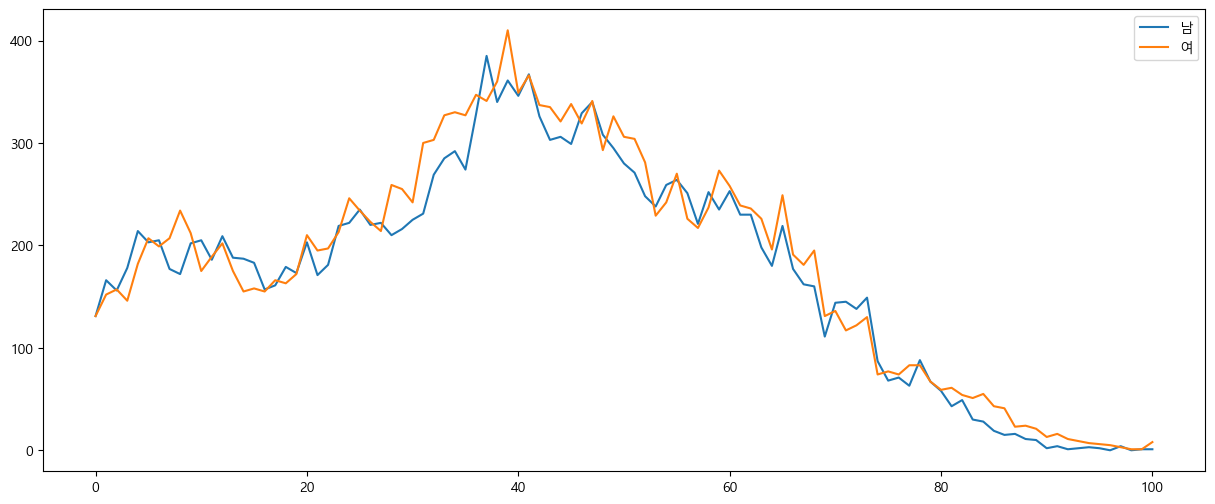

In [68]:
# 결과로 시각화

plt.figure(figsize=(15, 6))
plt.plot(list_result[0][1:102], label="남")
plt.plot(list_result[0][102:], label="여")
plt.legend()
plt.show()

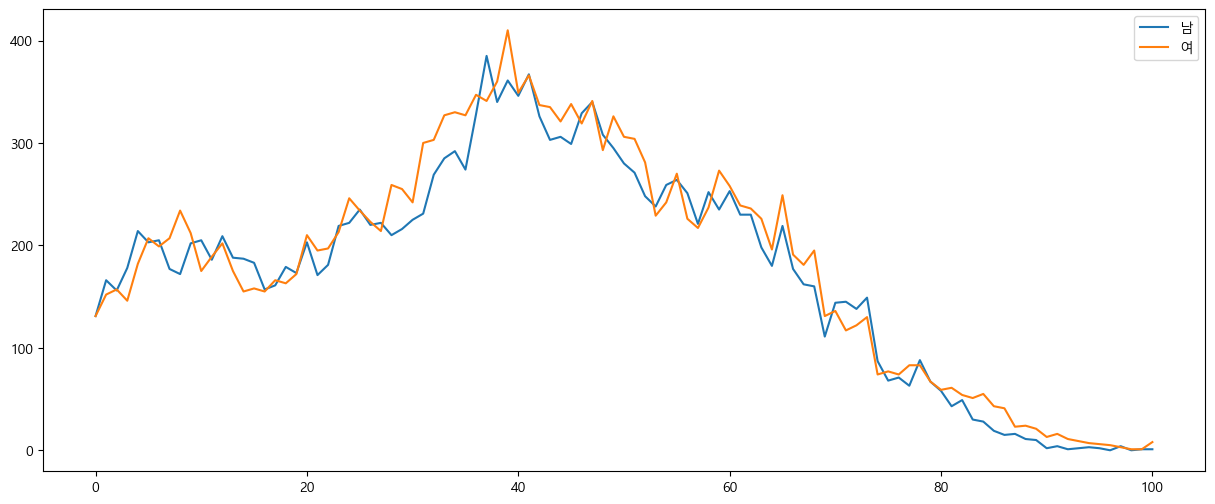

In [77]:
# 결과로 시각화 2

plt.figure(figsize=(15, 6))
keys = dict_result.keys()
key_list = list(keys)
first_key = key_list[0]
plt.plot(dict_result[first_key]["male"], label="남")
plt.plot(dict_result[list(dict_result.keys())[0]]["female"], label="여")
plt.legend()
plt.show()

In [81]:
# list_result 또는 dict_result 사용해서 성비의 리스트 만들기
# [ [0세남성인구비율, 1세남성인구비열, ...], [0세여성인구비율, 1세여성인구비율, ...] ]
# [ (0세남성인구비율, 0세여성인구비유), (1세남성인구비열, 1세여성인구비율), ... ]
# 남성인구비율 : 남성인구/(남성인구  + 여성인구), 여성인구비율 : 여성인구/(남성인구  + 여성인구)

# for idx, (male, female) in enumerate(zip(list_result[0][1:102], list_result[0][102:])):
#     if idx < 5:
#         print(male, female)

ratio = []
for _, (male, female) in enumerate(zip(list_result[0][1:102], list_result[0][102:])):
    total = male + female
    if total == 0:
        ratio.append((0, 0))
    else:
        ratio.append( (male / total, female / total) )


In [82]:
ratio[:5]

[(0.5, 0.5),
 (0.5220125786163522, 0.4779874213836478),
 (0.4984025559105431, 0.5015974440894568),
 (0.5493827160493827, 0.4506172839506173),
 (0.5404040404040404, 0.4595959595959596)]

In [83]:
import csv

In [92]:
subway_data = []
with open('data-files/subwayfee.csv', 'rt', encoding="utf-8") as f:
    reader = csv.reader(f)
    columns = next(reader)
    print(columns)
    for row in reader:
        subway_data.append(row[:4] + list(map(lambda v: int(v.replace(",", "")), row[4:])) ) 
        # subway_data.append(row[:4] + [ int(v.replace(",", "")) for v in row[4:] ])


['\ufeff사용월', '호선명', '역ID', '지하철역', '유임승차', '유임하차', '무임승차', '무임하차']


In [91]:
print( len(subway_data) )
subway_data[:5]

603


[['Nov-20', '1호선', '1', '서울역', 970425, 919628, 163629, 153605],
 ['Nov-20', '1호선', '10', '동묘앞', 123243, 131205, 130264, 131631],
 ['Nov-20', '1호선', '2', '시청', 470299, 476546, 61681, 59054],
 ['Nov-20', '1호선', '3', '종각', 779391, 757727, 111601, 103762],
 ['Nov-20', '1호선', '4', '종로3가', 415759, 380983, 253486, 236161]]

In [105]:
# subway_data에 전체 승차인원, 무임 승차비율 계산해서 추가
subway_data2 = map(lambda row: row + [row[4] + row[6], row[6] / (row[4] + row[6])], 
                   subway_data)
subway_data2 = list(subway_data2)           

In [117]:
# subway_data에 전체 승차인원, 무임 승차비율 계산해서 추가
def calc_ratio(row):
    total = row[4] + row[6]
    if total < 100000:
        return row + [0, 0]
    else:
        return row + [total, row[6] / total]
    
subway_data3 = map(calc_ratio, subway_data)
subway_data3 = list(subway_data3)   

In [106]:
subway_data2[:3]

[['Nov-20',
  '1호선',
  '1',
  '서울역',
  970425,
  919628,
  163629,
  153605,
  1134054,
  0.14428677999460343],
 ['Nov-20',
  '1호선',
  '10',
  '동묘앞',
  123243,
  131205,
  130264,
  131631,
  253507,
  0.5138477438492822],
 ['Nov-20',
  '1호선',
  '2',
  '시청',
  470299,
  476546,
  61681,
  59054,
  531980,
  0.11594608819880446]]

In [107]:
max_idx = 0
max_v = 0

for idx, row in enumerate(subway_data2):
    if row[-1] > max_v:
        max_v = row[-1]
        max_idx = idx

print(subway_data2[max_idx])

['Nov-20', '경원선', '373', '소요산', 34546, 27980, 58648, 51959, 93194, 0.6293108998433375]


In [104]:
ar = [1, 45, 22, 37, 11, 9]
ar.sort()
ar

[1, 9, 11, 22, 37, 45]

In [108]:
subway_data2.sort(key=lambda row:row[9], reverse=True)

In [110]:
subway_data2[:10]

[['Nov-20',
  '경원선',
  '373',
  '소요산',
  34546,
  27980,
  58648,
  51959,
  93194,
  0.6293108998433375],
 ['Nov-20',
  '1호선',
  '8',
  '제기동',
  223204,
  216130,
  240998,
  257699,
  464202,
  0.519166225048578],
 ['Nov-20',
  '1호선',
  '10',
  '동묘앞',
  123243,
  131205,
  130264,
  131631,
  253507,
  0.5138477438492822],
 ['Nov-20',
  '중앙선',
  '170',
  '용문',
  28409,
  28442,
  29779,
  30004,
  58188,
  0.5117721867051626],
 ['Nov-20',
  '중앙선',
  '169',
  '원덕',
  4652,
  4770,
  4721,
  4588,
  9373,
  0.5036807852341832],
 ['Nov-20',
  '경춘선',
  '218',
  '굴봉산',
  1750,
  1586,
  1728,
  1782,
  3478,
  0.4968372627947096],
 ['Nov-20',
  '중앙선',
  '164',
  '신원',
  3160,
  2777,
  2969,
  2475,
  6129,
  0.4844183390438897],
 ['Nov-20',
  '경춘선',
  '216',
  '상천',
  4146,
  3581,
  3831,
  3817,
  7977,
  0.4802557352388116],
 ['Nov-20',
  '우이신설선',
  '703',
  '삼양사거리',
  32460,
  32732,
  29821,
  30429,
  62281,
  0.4788137634270484],
 ['Nov-20', '경의선', '197', '임진강', 347, 212, 295, 300

In [118]:
subway_data3.sort(key=lambda row:row[9], reverse=True)

In [119]:
subway_data3[:10]

[['Nov-20',
  '1호선',
  '8',
  '제기동',
  223204,
  216130,
  240998,
  257699,
  464202,
  0.519166225048578],
 ['Nov-20',
  '1호선',
  '10',
  '동묘앞',
  123243,
  131205,
  130264,
  131631,
  253507,
  0.5138477438492822],
 ['Nov-20',
  '1호선',
  '9',
  '청량리(서울시립대입구)',
  320602,
  315752,
  238000,
  240168,
  558602,
  0.4260636374377464],
 ['Nov-20',
  '경원선',
  '360',
  '도봉산',
  135015,
  71478,
  91543,
  72159,
  226558,
  0.40405988753431793],
 ['Nov-20',
  '1호선',
  '4',
  '종로3가',
  415759,
  380983,
  253486,
  236161,
  669245,
  0.3787641297282759],
 ['Nov-20',
  '1호선',
  '5',
  '종로5가',
  342225,
  351197,
  205830,
  197086,
  548055,
  0.3755644962640611],
 ['Nov-20',
  '경원선',
  '359',
  '도봉',
  99661,
  93231,
  59410,
  59023,
  159071,
  0.37348102419674234],
 ['Nov-20',
  '6호선',
  '447',
  '월드컵경기장(성산)',
  82002,
  87983,
  48400,
  48537,
  130402,
  0.37115995153448567],
 ['Nov-20',
  '우이신설선',
  '700',
  '가오리',
  64978,
  61576,
  37677,
  38992,
  102655,
  0.36702547367395

In [ ]:
# subwaytime.csv 파일 사용

# 지하철 시간대별 이용 현황 전처리 ( 파일에서 데이터 읽기 -> list에 저장 )

# 출근 시간대 (7 ~ 9) 승하차 승객이 가장 많은 역

# 23시 최대 이용역

# 시간대별 승하차 인원이 가장 많은 역

# 시간대별 전체 이용고객 수

In [120]:
# 지하철 시간대별 이용 현황 전처리 ( 파일에서 데이터 읽기 -> list에 저장 )

subwaytime_data = []
with open('data-files/subwaytime.csv', 'rt', encoding="utf-8") as f:
    reader = csv.reader(f)
    next(reader)
    next(reader)
    for row in reader:
        row_data = row[:4] + [ int(v.replace(",", "")) for v in row[4:] ]
        subwaytime_data.append(row_data)

In [131]:
# 출근 시간대 (7 ~ 9) 승하차 승객이 가장 많은 역

# subwaytime_data[0][10:14]
total = []
for row in subwaytime_data:
    total.append( ( row[3],  sum(row[10:14]), row[10] + row[12], row[11] + row[13] ) ) 

In [132]:
total.sort(key=lambda row: row[1], reverse=True)
total[:10]

[('구로디지털단지', 632572, 314145, 318427),
 ('신림', 589373, 497567, 91806),
 ('강남', 544712, 92260, 452452),
 ('가산디지털단지', 530771, 43048, 487723),
 ('잠실(송파구청)', 468383, 247022, 221361),
 ('삼성(무역센터)', 462933, 34020, 428913),
 ('역삼', 454049, 36342, 417707),
 ('선릉', 422529, 48785, 373744),
 ('양재(서초구청)', 405803, 73013, 332790),
 ('신도림', 403833, 256007, 147826)]

In [135]:
# 23시 최대 이용역
from_hour = 23
column_index = from_hour * 2 - 4
total2 = []
for row in subwaytime_data:
    total2.append( ( row[3], sum(row[column_index: column_index + 2]), row[column_index], row[column_index + 1] ) )

In [137]:
total2.sort(key=lambda row: row[1], reverse=True)

In [138]:
total2[:10]

[('신림', 85828, 16062, 69766),
 ('홍대입구', 76002, 47948, 28054),
 ('강남', 75555, 54414, 21141),
 ('서울대입구(관악구청)', 56341, 15607, 40734),
 ('사당', 55444, 23081, 32363),
 ('구로디지털단지', 55256, 13506, 41750),
 ('건대입구', 54589, 29198, 25391),
 ('신도림', 54434, 14798, 39636),
 ('잠실(송파구청)', 54145, 17693, 36452),
 ('연신내', 39992, 6494, 33498)]

In [160]:
# 시간대별 승하차 인원이 가장 많은 역
def count_by_hour(hour):
    from_index = hour * 2 - 4
    total = []
    for row in subwaytime_data:
        total.append( (row[3], sum(row[from_index : from_index + 2])))

    total.sort(key=lambda x: x[1], reverse=True)
    return total

In [161]:
for hour in range(4, 25):
    print("{0}시 : {1}".format(hour, count_by_hour(hour)[0]))

4시 : ('구로', 12233)
5시 : ('구로디지털단지', 46091)
6시 : ('신림', 91841)
7시 : ('신림', 228928)
8시 : ('구로디지털단지', 426027)
9시 : ('강남', 367056)
10시 : ('강남', 191771)
11시 : ('강남', 163650)
12시 : ('강남', 179102)
13시 : ('강남', 216858)
14시 : ('강남', 208002)
15시 : ('강남', 229334)
16시 : ('강남', 249608)
17시 : ('강남', 356603)
18시 : ('강남', 510494)
19시 : ('강남', 326013)
20시 : ('강남', 211718)
21시 : ('강남', 228649)
22시 : ('강남', 193189)
23시 : ('신림', 85828)
24시 : ('서울대입구(관악구청)', 12809)


In [162]:
# 시간대별 전체 이용고객 수
total4 = {}
for row in subwaytime_data:
    for hour in range(4, 28):
        from_index = hour * 2 - 4
        cnt = sum(row[from_index:from_index + 2])
        if hour%24 in total4:
            total4[hour%24] += cnt
        else:
            total4[hour%24] = cnt

In [163]:
total4

{4: 124074,
 5: 3522068,
 6: 9323940,
 7: 23229713,
 8: 37120792,
 9: 22803435,
 10: 14665133,
 11: 13898406,
 12: 15114441,
 13: 16169953,
 14: 15978149,
 15: 17407846,
 16: 20067136,
 17: 26709628,
 18: 37037039,
 19: 24065619,
 20: 15642134,
 21: 14195388,
 22: 11073738,
 23: 5546914,
 0: 578627,
 1: 822,
 2: 703,
 3: 508}

In [164]:
import matplotlib.pyplot as plt

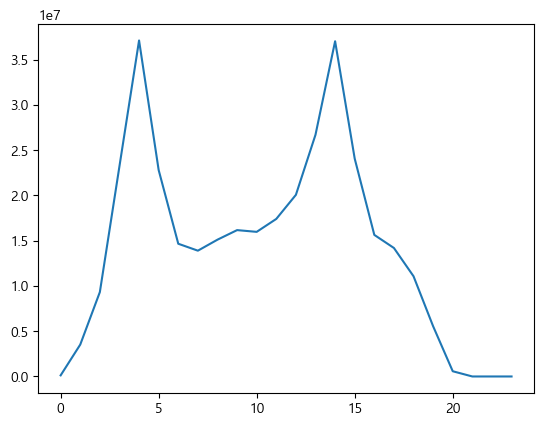

In [172]:
plt.plot(total4.values())
plt.show()

In [169]:
list(total4.keys())

[4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 0,
 1,
 2,
 3]

In [174]:
# 시군구,번지,본번,부번,단지명,면적,계약년월,계약일,가격,층,건축년도,도로명
apt_data = []
with open('data-files/apt-2020.csv', 'rt', encoding="utf-8") as f:
    reader = csv.reader(f)
    next(reader)

    for row in reader:
        apt_data.append(row[:5] + \
                        [ float(row[5])] + \
                        [ int(row[6][:4]), int(row[6][4:]) ] + \
                        [ int(v.replace(",", "")) for v in row[7:11] ] + \
                        row[-1:])

In [177]:
# apt_data.sort(...) # 데이터 원본 정렬
sorted_apt_data = sorted(apt_data, key=lambda row: row[9], reverse=True) # 정렬된 복사본 반환

In [178]:
sorted_apt_data[:3]

[['서울특별시 용산구 한남동',
  '810',
  '0810',
  '0000',
  '한남더힐',
  243.642,
  2020,
  9,
  4,
  775000,
  1,
  2011,
  '독서당로 111'],
 ['서울특별시 용산구 한남동',
  '810',
  '0810',
  '0000',
  '한남더힐',
  241.052,
  2020,
  11,
  9,
  760000,
  -1,
  2011,
  '독서당로 111'],
 ['서울특별시 용산구 한남동',
  '810',
  '0810',
  '0000',
  '한남더힐',
  240.23,
  2020,
  9,
  21,
  730000,
  3,
  2011,
  '독서당로 111']]

In [179]:
sorted_apt_data[-3:]

[['충청북도 증평군 도안면 석곡리',
  '576-6',
  '0576',
  '0006',
  '미혼여성근로자임대아파트',
  37.96,
  2020,
  7,
  17,
  571,
  4,
  1990,
  '원명로 78'],
 ['경기도 수원장안구 연무동',
  '226-1',
  '0226',
  '0001',
  '남창',
  59.13,
  2020,
  2,
  28,
  562,
  2,
  1983,
  '창훈로20번길 11-11'],
 ['전라남도 고흥군 도화면 당오리',
  '487',
  '0487',
  '0000',
  '뉴코아',
  22.68,
  2020,
  3,
  13,
  515,
  5,
  1997,
  '동신길 70']]